# Análisis de datos de actividad cerebral

Francelio Uriel Rodriguez García - A01352663, Juan Pablo Bernal Lafarga - A01742342, Juan Pablo Valenzuela Dorado - A00227321

In [627]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
import random
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# Potencial P300 vs No Potencial P300 - FRAN

In [573]:
data_f=pd.read_csv('P300_Fran_Features.txt',delimiter="\t", header=None) # <--- Conjunto de datos de Francelio
 
# Eliminar columna con valores NaN
data_f = data_f.dropna(axis=1)

# Separar target
X = data_f.iloc[:,2:]
Y = data_f[0]

# Aplicar sobremuestreo a la clase minoritaria
ros = RandomUnderSampler(random_state=42)
X, Y = ros.fit_resample(X, Y)

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [574]:
#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, Y):
    
    # Training phase
    x_train = X.iloc[train_index, :]
    y_train = Y.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X.iloc[test_index, :]
    y_test = Y.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.87      0.81      0.84       280
           2       0.82      0.88      0.85       280

    accuracy                           0.84       560
   macro avg       0.84      0.84      0.84       560
weighted avg       0.84      0.84      0.84       560



In [575]:
clf = KNeighborsClassifier()
clf.fit(X, Y)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, Y):
    
    # Training phase
    x_train = X.iloc[train_index, :]
    y_train = Y.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X.iloc[test_index, :]
    y_test = Y.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.73      0.85      0.78       280
           2       0.82      0.69      0.75       280

    accuracy                           0.77       560
   macro avg       0.77      0.77      0.77       560
weighted avg       0.77      0.77      0.77       560



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

In [576]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'p': [1, 2]  # Valores posibles para la distancia utilizada (1: Manhattan, 2: Euclidiana)
}

knn = KNeighborsClassifier()

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo con los mejores hiperparámetros utilizando el conjunto de prueba
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

Mejores hiperparámetros encontrados:
{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Exactitud del modelo con los mejores hiperparámetros: 83.04%


d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [577]:
#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, Y):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.79      0.79      0.79       280
           2       0.79      0.79      0.79       280

    accuracy                           0.79       560
   macro avg       0.79      0.79      0.79       560
weighted avg       0.79      0.79      0.79       560



2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [578]:
# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, Y):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.83      0.83      0.83       280
           2       0.83      0.83      0.83       280

    accuracy                           0.83       560
   macro avg       0.83      0.83      0.83       560
weighted avg       0.83      0.83      0.83       560



In [579]:
#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, Y):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.84      0.78      0.81       280
           2       0.79      0.85      0.82       280

    accuracy                           0.81       560
   macro avg       0.81      0.81      0.81       560
weighted avg       0.81      0.81      0.81       560



4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [580]:
data_f = data_f.select_dtypes(exclude=['object'])
data_f = data_f.replace([np.inf, -np.inf, np.nan], 0)

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, Y)

mask = selector.get_support()
new_features = X.columns[mask]
print(new_features)

Int64Index([20, 21, 22, 23, 28, 29, 30, 31, 32, 41], dtype='int64')


In [632]:
X = data_f[[20,21,22,23,28,29,30,31,32,69]]
Y = data_f[0]

# Balanceamos nuestro cconjunto de datos 
rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)

#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, Y):
    
    # Training phase
    x_train = X.iloc[train_index, :]
    y_train = Y.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X.iloc[test_index, :]
    y_test = Y.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82       280
           2       0.81      0.85      0.83       280

    accuracy                           0.82       560
   macro avg       0.82      0.82      0.82       560
weighted avg       0.82      0.82      0.82       560



# Potencial P300 vs No Potencial P300 - JUAN PABLO

In [582]:
data_j=pd.read_csv('P300_JP_Features.txt',delimiter="\t", header=None) # <--- Conjunto de datos de Juan Pablo

# Eliminar columna con valores NaN
data_j = data_j.dropna(axis=1)

# Separar target
x = data_j.iloc[:,2:]
y = data_j[0]

# Aplicar sobremuestreo a la clase minoritaria
ros = RandomUnderSampler(random_state=42)
x, y = ros.fit_resample(x, y)

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [583]:
#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.76      0.71      0.74       280
           2       0.73      0.78      0.75       280

    accuracy                           0.74       560
   macro avg       0.75      0.74      0.74       560
weighted avg       0.75      0.74      0.74       560



In [584]:
clf = KNeighborsClassifier()
clf.fit(x, y)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.61      0.64      0.63       280
           2       0.62      0.59      0.61       280

    accuracy                           0.62       560
   macro avg       0.62      0.62      0.62       560
weighted avg       0.62      0.62      0.62       560



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

In [585]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'p': [1, 2]  # Valores posibles para la distancia utilizada (1: Manhattan, 2: Euclidiana)
}

knn = KNeighborsClassifier()

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo con los mejores hiperparámetros utilizando el conjunto de prueba
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, Y_train)
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Exactitud del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

Mejores hiperparámetros encontrados:
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Exactitud del modelo con los mejores hiperparámetros: 78.57%


d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [586]:
#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.62      0.77      0.69       280
           2       0.70      0.52      0.60       280

    accuracy                           0.65       560
   macro avg       0.66      0.65      0.64       560
weighted avg       0.66      0.65      0.64       560



2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [587]:
# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.60      0.81      0.69       280
           2       0.71      0.47      0.56       280

    accuracy                           0.64       560
   macro avg       0.66      0.64      0.63       560
weighted avg       0.66      0.64      0.63       560



In [588]:
#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.75      0.72      0.73       280
           2       0.73      0.75      0.74       280

    accuracy                           0.74       560
   macro avg       0.74      0.74      0.74       560
weighted avg       0.74      0.74      0.74       560



4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [589]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(x, y)

mask = selector.get_support()
new_features = x.columns[mask]
print(new_features)

Int64Index([13, 14, 20, 21, 28, 29, 30, 31, 32, 33], dtype='int64')


In [590]:
x = data_j[[13,14,17,20,21,29,30,31,32,33]]
y = data_j[0]

# Balanceamos nuestro cconjunto de datos 
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(x, y)

#K-NEAREST NEIGHBOUR

clf = KNeighborsClassifier()
clf.fit(x, y)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.70      0.66      0.68       280
           2       0.68      0.72      0.70       280

    accuracy                           0.69       560
   macro avg       0.69      0.69      0.69       560
weighted avg       0.69      0.69      0.69       560



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

# Aprendizaje por transferencia

In [629]:
# Crear el modelo GradientBoostingClassifier
modelo = GradientBoostingClassifier()

# Realizar la validación cruzada en los datos del primer sujeto
cv_scores = cross_val_score(modelo, X, Y, cv=5)  # Utiliza 5 folds para la validación cruzada

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada en los datos del primer sujeto:")
print("Precisión promedio:", cv_scores.mean())

# Entrenar el modelo con todos los datos del primer sujeto
modelo.fit(X, Y)

# Predecir las etiquetas para los datos del segundo sujeto
y_pred_sujeto_2 = modelo.predict(x)

# Calcular la precisión del modelo en los datos del segundo sujeto
precision = accuracy_score(y, y_pred_sujeto_2)
print("Precisión en los datos del segundo sujeto:", precision)

Resultados de la validación cruzada en los datos del primer sujeto:
Precisión promedio: 0.87219514710812
Precisión en los datos del segundo sujeto: 0.5660714285714286


In [630]:
# Crear el modelo SVC
modelo = SVC()

# Realizar la validación cruzada en los datos del primer sujeto
cv_scores = cross_val_score(modelo, X, Y, cv=5)  # Utiliza 5 folds para la validación cruzada

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada en los datos del primer sujeto:")
print("Precisión promedio:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

# Entrenar el modelo con todos los datos del primer sujeto
modelo.fit(X, Y)

# Predecir las etiquetas para los datos del segundo sujeto
y_pred_sujeto_2 = modelo.predict(x)

# Calcular la precisión del modelo en los datos del segundo sujeto
precision = accuracy_score(y, y_pred_sujeto_2)
print("Precisión en los datos del segundo sujeto:", precision)

Resultados de la validación cruzada en los datos del primer sujeto:
Precisión promedio: 0.8779376498800959
Desviación estándar: 0.029613918742504197
Precisión en los datos del segundo sujeto: 0.5035714285714286


Las respectivas preguntas de este apartado se encuentran en el reporte de cada miembro del equipo, pues cada uno respondió por sí mismo.

# No Tarea Cognitiva (cruz) vs Tarea Cognitiva - FRAN

In [591]:
data_f1=pd.read_csv('Cognitiva_Fran_Features.txt',delimiter="\t", header=None) # <--- Conjunto de datos de Francelio
 
# Eliminar columna con valores NaN
data_f1 = data_f1.dropna(axis=1)

# Separar target
Y2 = data_f1[0].replace({13: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1})
X2 = data_f1.iloc[:,2:]

# Aplicar sobremuestreo a la clase minoritaria
ros = RandomUnderSampler(random_state=42)
X2, Y2 = ros.fit_resample(X2, Y2)

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [592]:
#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X2, Y2):
    
    # Training phase
    x_train = X2.iloc[train_index, :]
    y_train = Y2.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X2.iloc[test_index, :]
    y_test = Y2.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.72      0.74      0.73        96
           2       0.73      0.71      0.72        96

    accuracy                           0.72       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.72      0.72      0.72       192



In [593]:
clf = KNeighborsClassifier()
clf.fit(X2, Y2)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X2, Y2):
    
    # Training phase
    x_train = X2.iloc[train_index, :]
    y_train = Y2.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X2.iloc[test_index, :]
    y_test = Y2.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.75      0.79      0.77        96
           2       0.78      0.73      0.75        96

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

In [594]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'p': [1, 2]  # Valores posibles para la distancia utilizada (1: Manhattan, 2: Euclidiana)
}

knn = KNeighborsClassifier()

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo con los mejores hiperparámetros utilizando el conjunto de prueba
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

Mejores hiperparámetros encontrados:
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Exactitud del modelo con los mejores hiperparámetros: 57.89%


d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [595]:
#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X2, Y2):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    Y_train, Y_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.54      0.52      0.53        96
           2       0.54      0.55      0.54        96

    accuracy                           0.54       192
   macro avg       0.54      0.54      0.54       192
weighted avg       0.54      0.54      0.54       192



2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [596]:
# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X2, Y2):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    Y_train, Y_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.70      0.71      0.70        96
           2       0.71      0.70      0.70        96

    accuracy                           0.70       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.70      0.70      0.70       192



In [597]:
#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X2, Y2):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    Y_train, Y_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.75      0.69      0.72        96
           2       0.71      0.77      0.74        96

    accuracy                           0.73       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.73      0.73      0.73       192



4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [598]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X2, Y2)

mask = selector.get_support()
new_features = X2.columns[mask]
print(new_features)

Int64Index([520, 664, 764, 824, 842, 873, 914, 926, 927, 2304], dtype='int64')


In [599]:
Y22 = data_f1[0].replace({13: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1})
X22 = data_f1[[520,663,764,806,824,842,848,873,914,927]]

# Balanceamos nuestro cconjunto de datos 
rus = RandomUnderSampler(random_state=42)
X22, Y22 = rus.fit_resample(X22, Y22)

#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X22, Y22):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X22.iloc[train_index], X22.iloc[test_index]
    Y_train, Y_test = Y22.iloc[train_index], Y22.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.61      0.86      0.72        96
           2       0.77      0.46      0.58        96

    accuracy                           0.66       192
   macro avg       0.69      0.66      0.65       192
weighted avg       0.69      0.66      0.65       192



# No Tarea Cognitiva (cruz) vs Tarea Cognitiva - JUAN PABLO

In [600]:
data_j1=pd.read_csv('jptest2feats.txt',delimiter="\t", header=None) # <--- Conjunto de datos de Francelio
 
# Eliminar columna con valores NaN
data_j1 = data_j1.dropna(axis=1)

# Separar target
y2 = data_j1[0].replace({13: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1})
x2 = data_j1.iloc[:,2:]

# Aplicar sobremuestreo a la clase minoritaria
ros = RandomUnderSampler(random_state=42)
x2, y2 = ros.fit_resample(x2, y2)

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [601]:
#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x2, y2):
    
    # Training phase
    x_train = x2.iloc[train_index, :]
    y_train = y2.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x2.iloc[test_index, :]
    y_test = y2.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.63      0.71      0.67       106
           2       0.67      0.58      0.62       106

    accuracy                           0.65       212
   macro avg       0.65      0.65      0.64       212
weighted avg       0.65      0.65      0.64       212



In [602]:
clf = KNeighborsClassifier()
clf.fit(x2, y2)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0.])
precision = np.array([0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x2, y2):
    
    # Training phase
    x_train = x2.iloc[train_index, :]
    y_train = y2.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x2.iloc[test_index, :]
    y_test = y2.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.60      0.64      0.62       106
           2       0.61      0.57      0.59       106

    accuracy                           0.60       212
   macro avg       0.60      0.60      0.60       212
weighted avg       0.60      0.60      0.60       212



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

In [603]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'p': [1, 2]  # Valores posibles para la distancia utilizada (1: Manhattan, 2: Euclidiana)
}

knn = KNeighborsClassifier()

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo con los mejores hiperparámetros utilizando el conjunto de prueba
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

Mejores hiperparámetros encontrados:
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Exactitud del modelo con los mejores hiperparámetros: 73.81%


d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [604]:
#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x2, y2):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    Y_train, Y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.58      0.45      0.51       106
           2       0.55      0.67      0.60       106

    accuracy                           0.56       212
   macro avg       0.56      0.56      0.56       212
weighted avg       0.56      0.56      0.56       212



2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [605]:
# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x2, y2):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    Y_train, Y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.55      0.87      0.67       106
           2       0.69      0.29      0.41       106

    accuracy                           0.58       212
   macro avg       0.62      0.58      0.54       212
weighted avg       0.62      0.58      0.54       212



In [606]:
#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x2, y2):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    Y_train, Y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.67      0.70      0.69       106
           2       0.69      0.66      0.67       106

    accuracy                           0.68       212
   macro avg       0.68      0.68      0.68       212
weighted avg       0.68      0.68      0.68       212



4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [607]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(x2, y2)

mask = selector.get_support()
new_features = x2.columns[mask]
print(new_features)

Int64Index([8, 9, 16, 17, 24, 69, 77, 85, 93, 101], dtype='int64')


In [608]:
y22 = data_j1[0].replace({13: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1})
x22 = data_j1[new_features]

# Balanceamos nuestro cconjunto de datos 
rus = RandomUnderSampler(random_state=42)
x22, y22 = rus.fit_resample(x22, y22)

# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x22, y22):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x22.iloc[train_index], x22.iloc[test_index]
    Y_train, Y_test = y22.iloc[train_index], y22.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.63      0.65      0.64       106
           2       0.64      0.61      0.62       106

    accuracy                           0.63       212
   macro avg       0.63      0.63      0.63       212
weighted avg       0.63      0.63      0.63       212



# Tarea De Cálculo vs Tarea De Lectura vs Tarea De Nombres De Cosas - FRAN

In [609]:
data_f2=pd.read_csv('jptest2feats.txt',delimiter="\t", header=None) # <--- Conjunto de datos de Francelio
 
# Eliminar columna con valores NaN
data_f2 = data_f2.dropna(axis=1)

filtro = data_f2[0] == 13
df_sin_13 = data_f2[~filtro]

# Separar target
y3 = df_sin_13[0].replace({1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3})
x3 = df_sin_13.iloc[:,2:]

# Aplicar sobremuestreo a la clase minoritaria
ros = RandomUnderSampler(random_state=42)
x3, y3 = ros.fit_resample(x3, y3)

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [610]:
#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x3, y3):
    
    # Training phase
    x_train = x3.iloc[train_index, :]
    y_train = y3.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x3.iloc[test_index, :]
    y_test = y3.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.51      0.66      0.58        56
           2       0.79      0.61      0.69        56
           3       0.42      0.39      0.40        56

    accuracy                           0.55       168
   macro avg       0.57      0.55      0.56       168
weighted avg       0.57      0.55      0.56       168



In [611]:
clf = KNeighborsClassifier()
clf.fit(x3, y3)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x3, y3):
    
    # Training phase
    x_train = x3.iloc[train_index, :]
    y_train = y3.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x3.iloc[test_index, :]
    y_test = y3.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.49      0.50      0.50        56
           2       0.68      0.64      0.66        56
           3       0.41      0.43      0.42        56

    accuracy                           0.52       168
   macro avg       0.53      0.52      0.53       168
weighted avg       0.53      0.52      0.53       168



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

In [612]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'p': [1, 2]  # Valores posibles para la distancia utilizada (1: Manhattan, 2: Euclidiana)
}

knn = KNeighborsClassifier()

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo con los mejores hiperparámetros utilizando el conjunto de prueba
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

Mejores hiperparámetros encontrados:
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Exactitud del modelo con los mejores hiperparámetros: 60.61%


d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [613]:
#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x3, y3):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    Y_train, Y_test = y3.iloc[train_index], y3.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.47      0.14      0.22        56
           2       0.40      0.30      0.34        56
           3       0.33      0.64      0.44        56

    accuracy                           0.36       168
   macro avg       0.40      0.36      0.33       168
weighted avg       0.40      0.36      0.33       168



2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [614]:
# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x3, y3):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    Y_train, Y_test = y3.iloc[train_index], y3.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.47      0.48      0.48        56
           2       0.58      0.50      0.54        56
           3       0.35      0.39      0.37        56

    accuracy                           0.46       168
   macro avg       0.47      0.46      0.46       168
weighted avg       0.47      0.46      0.46       168



In [615]:
#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x3, y3):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    Y_train, Y_test = y3.iloc[train_index], y3.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.70      0.57      0.63        56
           2       0.70      0.75      0.72        56
           3       0.58      0.64      0.61        56

    accuracy                           0.65       168
   macro avg       0.66      0.65      0.65       168
weighted avg       0.66      0.65      0.65       168



4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [616]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(x3, y3)

mask = selector.get_support()
new_features = x3.columns[mask]
print(new_features)

Int64Index([15, 23, 31, 39, 183, 191, 199, 207, 208, 215], dtype='int64')


In [617]:
y33 = df_sin_13[0].replace({1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3})
x33 = df_sin_13[new_features]

# Balanceamos nuestro cconjunto de datos 
rus = RandomUnderSampler(random_state=42)
x33, y33 = rus.fit_resample(x33, y33)

#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x33, y33):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = x33.iloc[train_index], x33.iloc[test_index]
    Y_train, Y_test = y33.iloc[train_index], y33.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.43      0.46      0.45        56
           2       0.35      0.32      0.33        56
           3       0.32      0.32      0.32        56

    accuracy                           0.37       168
   macro avg       0.37      0.37      0.37       168
weighted avg       0.37      0.37      0.37       168



# Tarea De Cálculo vs Tarea De Lectura vs Tarea De Nombres De Cosas - JUAN PABLO

In [618]:
data_j2=pd.read_csv('jptest2feats.txt',delimiter="\t", header=None) # <--- Conjunto de datos de Francelio
 
# Eliminar columna con valores NaN
data_j2 = data_j2.dropna(axis=1)

filtro = data_j2[0] == 13
df_sin_13 = data_j2[~filtro]

# Separar target
Y3 = df_sin_13[0].replace({1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3})
X3 = df_sin_13.iloc[:,2:]

# Aplicar sobremuestreo a la clase minoritaria
ros = RandomUnderSampler(random_state=42)
X3, Y3 = ros.fit_resample(X3, Y3)

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [619]:
#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X3, Y3):
    
    # Training phase
    x_train = X3.iloc[train_index, :]
    y_train = Y3.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X3.iloc[test_index, :]
    y_test = Y3.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.54      0.73      0.62        56
           2       0.80      0.64      0.71        56
           3       0.49      0.41      0.45        56

    accuracy                           0.60       168
   macro avg       0.61      0.60      0.59       168
weighted avg       0.61      0.60      0.59       168



In [620]:
clf = KNeighborsClassifier()
clf.fit(X3, Y3)

# K-fold cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

acc = 0
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X3, Y3):
    
    # Training phase
    x_train = X3.iloc[train_index, :]
    y_train = Y3.iloc[train_index]

    clf_cv = KNeighborsClassifier()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X3.iloc[test_index, :]
    y_test = Y3.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.42      0.43      0.42        56
           2       0.67      0.59      0.63        56
           3       0.34      0.38      0.36        56

    accuracy                           0.46       168
   macro avg       0.48      0.46      0.47       168
weighted avg       0.48      0.46      0.47       168



d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

In [621]:
hyperparameters = {
    'n_neighbors': [3, 5, 7],  # Valores posibles para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores posibles para el peso de los vecinos
    'p': [1, 2]  # Valores posibles para la distancia utilizada (1: Manhattan, 2: Euclidiana)
}

knn = KNeighborsClassifier()

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo con los mejores hiperparámetros utilizando el conjunto de prueba
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

Mejores hiperparámetros encontrados:
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Exactitud del modelo con los mejores hiperparámetros: 63.64%


d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Nueva carpeta\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [622]:
#MLP

clf = MLPClassifier(hidden_layer_sizes=(2,1), max_iter=10000)

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X3, Y3):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    Y_train, Y_test = Y3.iloc[train_index], Y3.iloc[test_index]
    
    # Entrenar el clasificador MLP
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.67      0.04      0.07        56
           2       0.41      0.34      0.37        56
           3       0.35      0.75      0.48        56

    accuracy                           0.38       168
   macro avg       0.48      0.38      0.31       168
weighted avg       0.48      0.38      0.31       168



2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [623]:
# Clasificador Bayesiano Ingenuo

clf = GaussianNB()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X3, Y3):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    Y_train, Y_test = Y3.iloc[train_index], Y3.iloc[test_index]
    
    # Entrenar el clasificador Naive Bayes
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.55      0.48      0.51        56
           2       0.61      0.54      0.57        56
           3       0.43      0.54      0.48        56

    accuracy                           0.52       168
   macro avg       0.53      0.52      0.52       168
weighted avg       0.53      0.52      0.52       168



In [624]:
#Gradient Boosting

clf = GradientBoostingClassifier()

# Realizar validación cruzada de 5 pliegues
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X3, Y3):
    # Separar datos de entrenamiento y prueba
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    Y_train, Y_test = Y3.iloc[train_index], Y3.iloc[test_index]
    
    # Entrenar el clasificador Gradient Boosting
    clf.fit(X_train, Y_train)
    
    # Realizar predicciones en datos de prueba
    Y_pred = clf.predict(X_test)
    
    # Almacenar las etiquetas reales y las predicciones de cada pliegue
    cv_y_test.append(Y_test)
    cv_y_pred.append(Y_pred)

# Concatenar las etiquetas reales y las predicciones de todos los pliegues
y_true = np.concatenate(cv_y_test)
y_pred = np.concatenate(cv_y_pred)

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.62      0.59      0.61        56
           2       0.70      0.71      0.71        56
           3       0.48      0.50      0.49        56

    accuracy                           0.60       168
   macro avg       0.60      0.60      0.60       168
weighted avg       0.60      0.60      0.60       168



4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [625]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X3, Y3)

mask = selector.get_support()
new_features = X3.columns[mask]
print(new_features)

Int64Index([15, 23, 31, 39, 183, 191, 199, 207, 208, 215], dtype='int64')


In [626]:
Y33 = df_sin_13[0].replace({1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3})
X33 = df_sin_13[new_features]

# Balanceamos nuestro cconjunto de datos 
rus = RandomUnderSampler(random_state=42)
X33, Y33 = rus.fit_resample(X33, Y33)

#SUPPORT VECTOR MACHINE (SVM)

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

acc = 0
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X33, Y33):
    
    # Training phase
    x_train = X33.iloc[train_index, :]
    y_train = Y33.iloc[train_index]

    clf_cv = SVC()
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = X33.iloc[test_index, :]
    y_test = Y33.iloc[test_index]    
    y_pred = clf_cv.predict(x_test)

    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)
   
# Model performance
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

           1       0.49      0.70      0.57        56
           2       0.40      0.52      0.45        56
           3       0.19      0.05      0.08        56

    accuracy                           0.42       168
   macro avg       0.36      0.42      0.37       168
weighted avg       0.36      0.42      0.37       168



# HIPERPARÁMETROS DE LOS MODELOS

SVM (Máquinas de soporte vectorial):

    *C: Parámetro de regularización.
    *kernel: Tipo de kernel utilizado (lineal, polinómico, radial, etc.).
    *gamma: Coeficiente para los kernels RBF, polinómico y sigmoidal.
    *degree: Grado del kernel polinómico.
    *coef0: Término independiente en los kernels polinómico y sigmoidal.

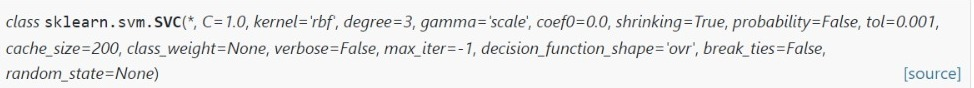

KNN (K vecinos más cercanos):

    *n_neighbors: Número de vecinos más cercanos a considerar.
    *weights: Método de ponderación de los vecinos (uniforme o por distancia).
    *algorithm: Algoritmo utilizado para calcular los vecinos más cercanos (ball_tree, kd_tree, brute, auto).
    *leaf_size: Tamaño de las hojas en los algoritmos de búsqueda de vecinos.
    *p: Parámetro para la métrica de distancia utilizada (1 para distancia Manhattan, 2 para distancia Euclidiana, etc.).

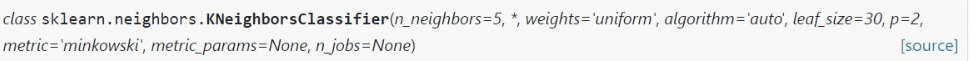

MLP (Perceptrón multicapa):

    *hidden_layer_sizes: Tamaños de las capas ocultas.
    *activation: Función de activación utilizada en las capas ocultas (relu, sigmoid, tanh, etc.).
    *solver: Algoritmo utilizado para optimizar los pesos (adam, lbfgs, sgd).
    *alpha: Término de regularización.
    *learning_rate: Tasa de aprendizaje utilizada para actualizar los pesos.

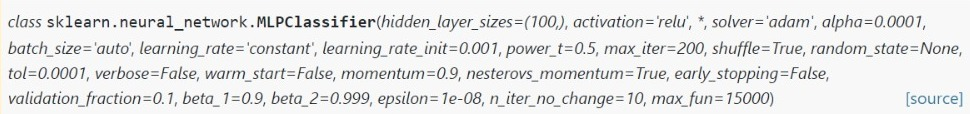

Gradient Boosting:

    *n_estimators: Especifica el número de estimadores o árboles de decisión que se utilizarán en el proceso de boosting. Por defecto, su valor es 100.

    *learning_rate: Controla la contribución de cada árbol en el modelo final. Un valor más bajo de learning_rate generalmente requiere un número mayor de estimadores para obtener un rendimiento óptimo. El valor predeterminado es 0.1.

    *max_depth: La profundidad máxima de cada árbol de decisión en el proceso de boosting. Un valor más alto puede aumentar el ajuste del modelo, pero también puede llevar a un mayor riesgo de sobreajuste. Por defecto, su valor es 3.

    *min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno durante la construcción de los árboles. Puede ser un valor entero o una fracción. El valor predeterminado es 2.

    *min_samples_leaf: El número mínimo de muestras requeridas para ser consideradas como una hoja (nodo final) en los árboles. Puede ser un valor entero o una fracción. Por defecto, su valor es 1.

    *subsample: La fracción de muestras a utilizar para entrenar cada árbol. Un valor menor a 1.0 reduce la varianza y puede ayudar a evitar el sobreajuste. El valor predeterminado es 1.0, lo que significa utilizar todas las muestras.

    *max_features: El número de características a considerar al buscar la mejor división en cada nodo. Puede ser un entero o una fracción. Por defecto, se utiliza la raíz cuadrada del número total de características.

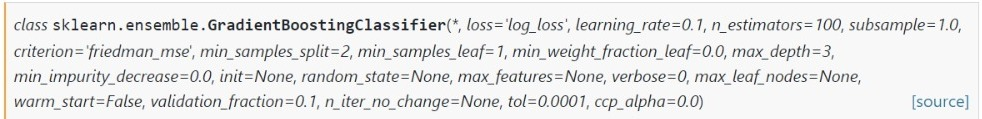

Clasificador Bayesiano Ingenuo (Naive Bayes):

    *alpha: Parámetro de suavizado Laplaciano.
    *fit_prior: Especifica si se deben estimar las probabilidades a priori de cada clase.
    *class_prior: Probabilidades a priori de cada clase.

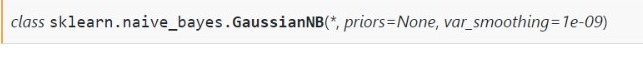

Se utilizaron los hiperparámetros defaul en todos los casos, tal como se observa en las imágenes de ejemplo de los clasificadores.